In [1]:
pwd

'C:\\Users\\Divyansh Kumar\\Desktop\\Collage stuff\\Jupyter_python'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [4]:
base_dir = r"C:\Users\Divyansh Kumar\Desktop\Collage stuff\Jupyter_python\FaceExpressionRecognition\dataset"
data = pd.read_csv(r"C:\Users\Divyansh Kumar\Desktop\Collage stuff\Jupyter_python\FaceExpressionRecognition\data.csv")
data.head()

,Unnamed: 0,path,label
0,0,Surprise/1bd930d6a1c717c11be33db74823f661cb53f...,Surprise
1,1,Surprise/cropped_emotions.100096~12fffff.png,Surprise
2,2,Surprise/0df0e470e33093f5b72a8197fa209d684032c...,Surprise
3,3,Surprise/cropped_emotions.260779~12fffff.png,Surprise
4,4,Surprise/cropped_emotions.263616~12fffff.png,Surprise


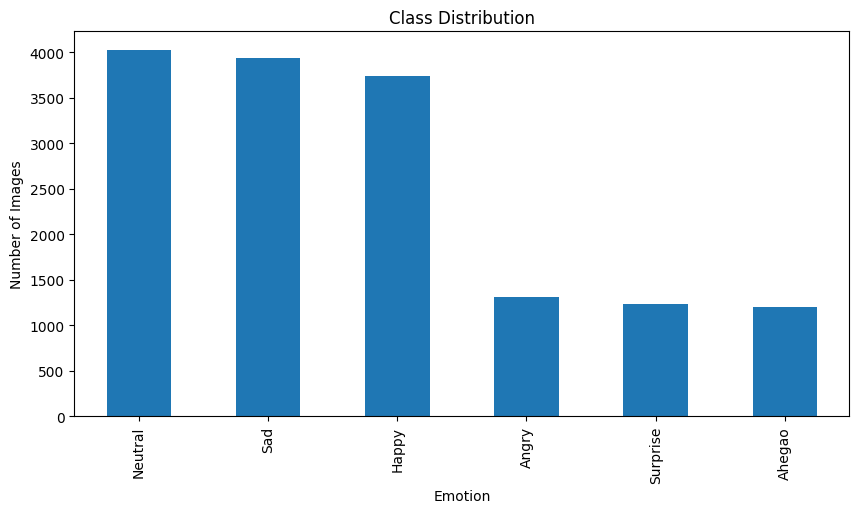

In [5]:
class_counts = data['label'].value_counts()
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.show()

In [ ]:

# Display some sample images from each class
def display_samples(data, base_dir, num_samples=5):
    # Exclude "Ahegao" and check if any other class is empty
    emotions_to_show = ['Happy', 'Angry', 'Sad', 'Neutral', 'Surprise', 'Ahegao']

    # Handle case where there are fewer emotions to show than expected
    num_rows = len(emotions_to_show)
    if num_rows == 0:
        print("No valid classes with images found.")
        return

    fig, axes = plt.subplots(num_rows, num_samples, figsize=(num_samples * 2, num_rows * 2))

    for i, emotion in enumerate(emotions_to_show):
        samples = data[data['label'] == emotion].sample(num_samples)
        for j, (idx, row) in enumerate(samples.iterrows()):
            img_path = os.path.join(base_dir, row['path'])
            img = load_img(img_path, target_size=(128, 128))  # Set target size to 128x128
            ax = axes[i, j]
            ax.imshow(img)
            ax.axis('off')
            if j == 0:
                ax.set_title(emotion)
    plt.tight_layout()
    plt.show()

# Example usage
display_samples(data, base_dir)

In [7]:
#Loading the dataset
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(128, 128))
    img = img_to_array(img)
    img = img / 255.0
    return img
X = []
y = []

for idx, row in data.iterrows():
    img_path = os.path.join(base_dir, row['path'])
    img = preprocess_image(img_path)
    X.append(img)
    y.append(row['label'])

X = np.array(X)
y = tf.keras.utils.to_categorical(y, num_classes=6)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (12362, 128, 128, 3)
Validation data shape: (3091, 128, 128, 3)


In [9]:
#Making a CNN Model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Compiling and training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.3009 - loss: 1.6217 - val_accuracy: 0.5108 - val_loss: 1.2171
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.4855 - loss: 1.2634 - val_accuracy: 0.5878 - val_loss: 1.0520
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5565 - loss: 1.0893 - val_accuracy: 0.6079 - val_loss: 0.9858
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.6216 - loss: 0.9506 - val_accuracy: 0.6231 - val_loss: 0.9547
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.6827 - loss: 0.7957 - val_accuracy: 0.6296 - val_loss: 0.9591
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7137 - loss: 0.7088 - val_accuracy: 0.6351 - val_loss: 0.9448
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 36s 94ms/step - accuracy: 0.7617 - loss: 0.6080 - val_accuracy: 0.6402 - val_loss: 0.9440
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.7928 - loss: 0.5195 -

In [11]:
model.evaluate(X_val, y_val)

97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6355 - loss: 1.1551


[1.133130431175232, 0.6360400915145874]

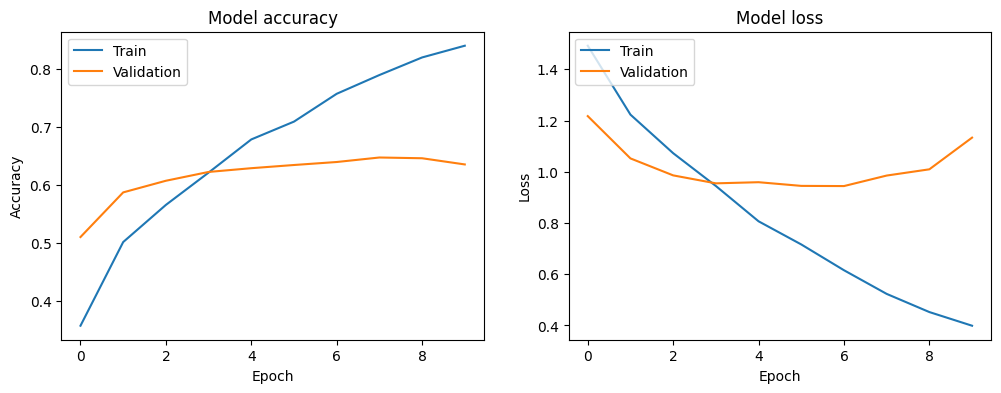

In [12]:
#Visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted emotion: Surprise


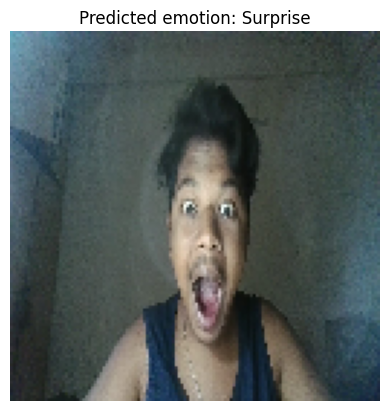

In [15]:
class_labels = ['Happy', 'Angry', 'Sad', 'Neutral', 'Surprise', 'Ahegao']



def preprocess_image(img_path):
    img = load_img(img_path, target_size=(128, 128))  # Change target_size to (128, 128)
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the input shape (1, 128, 128, 3)
    return img

# Predict function
def predict_emotion(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class, img

# Example usage
image_path = 'Gopal_surprise.jpg'  # Replace with the path of your uploaded image
if os.path.exists(image_path):
    emotion, preprocessed_image = predict_emotion(image_path)
    print(f"Predicted emotion: {emotion}")
    
    # Display the image
    original_image = load_img(image_path, target_size=(128, 128))  # Change target_size to (128, 128)
    plt.imshow(original_image)
    plt.title(f"Predicted emotion: {emotion}")
    plt.axis('off')
    plt.show()
else:
    print(f"Image file {image_path} does not exist.")